# LAB04: K-means

## Assignment 2 (4 scores):
- Generate a toy dataset having $50$ points following the Gaussian distribution $\mathcal{N}((2, 2), \Sigma)$, $20$ points of them following the Gaussian distribution $\mathcal{N}((8, 3), \Sigma)$, and $1000$ points of them following the Gaussian distribution $\mathcal{N}((3, 6), \Sigma)$ where $\Sigma = 
\left(\begin{array}{cc}
    1 & 0 \\
    0 & 1
\end{array}\right)
$.
- Use Numpy only to implement the K-means method for finding three clusters from the toy dataset.
- Train this K-means with EM method.


In [74]:
import numpy as np

In [75]:
mean = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0,1]]
n = [50, 20, 1000]

X0 = np.random.multivariate_normal(mean[0], cov, n[0])
X1 = np.random.multivariate_normal(mean[1], cov, n[1])
X2 = np.random.multivariate_normal(mean[2], cov, n[2])

In [76]:
X = np.vstack((X0, X1, X2))
original_label = np.asanyarray([0]*n[0] + [1]*n[1] + [2]*n[2])

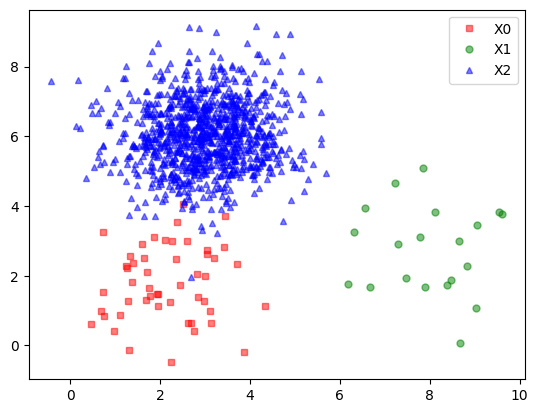

In [77]:
from assignment1 import plot_clusters
original_fig = plot_clusters(X, original_label)

In [78]:
from assignment1 import EM_kmeans
K = 3
centroids, labels, i = EM_kmeans(X, K)

In [79]:
print(mean)
print(n)
print(f'Centroids after {i} iterations: \n', centroids)

[[2, 2], [8, 3], [3, 6]]
[50, 20, 1000]
Centroids after 20 iterations: 
 [[3.72477907 2.1845946 ]
 [2.26446151 5.59763925]
 [3.60897337 6.47368293]]


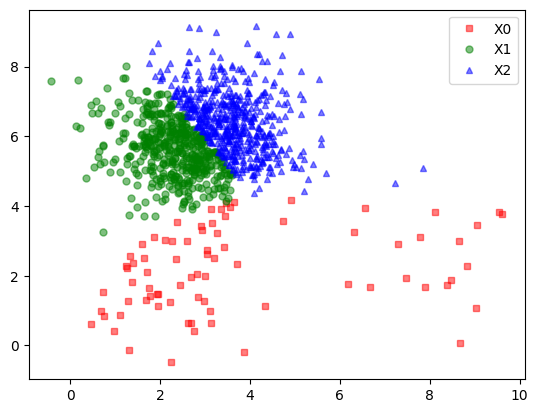

In [80]:
last_fig = plot_clusters(X, labels[-1])

In [81]:
from assignment1 import save_plots_pdf
save_plots_pdf(X, labels, 'assignment2')

Saved plots to assignment2.pdf


### Give comments on the effect of different sizes among clusters to the performance of K-means.

**Ảnh hướng của kích thước cụm lên kết quả K-means:**

- **Phân cụm kém chính xác:** K-means là bài toán tối ưu bình phương khoảng cách từ các điểm đến centroid nên cụm có nhiều điểm hơn = tổng khoảng cách lớn hơn = bị ảnh hưởng lớn bởi số lượng điểm -> centroid cụm nhỏ dễ bị lẫn và lệch tâm cụm về cụm lớn

- **Kết quả tệ ngay khi khởi tạo:** với cụm nhỏ, xác suất centroid khởi tạo rơi vào cụm thấp hơn

- **Trong trường hợp này:** cụm có kích thước lớn sẽ chi phối centroid chung như cụm [3, 6] với 1000 điểm ảnh hưởng lớn đến 2 cụm còn lại là cụm [2, 2], [8, 3] đã bị kéo lệch lên -> K-means không giữ được đúng vị trị trung tâm cụm ban đầu